In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
figure_folder = 'figures/'

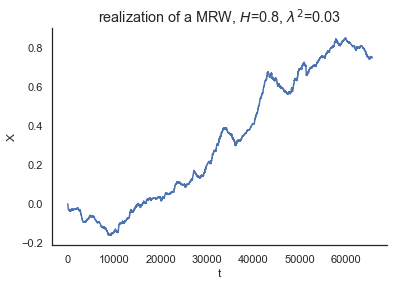

In [72]:
from pymultifracs.simul import mrw
import numpy as np

X = mrw(shape=65536, H=0.8, lam=np.sqrt(0.03), L=65536)

plt.plot(X)
plt.title(r'realization of a MRW, $H$=0.8, $\lambda^2$=0.03', size='large')
plt.ylabel('X')
plt.xlabel('t')
sns.despine()
plt.show()

In [73]:
from pymultifracs.wavelet import wavelet_analysis

In [74]:
WT = wavelet_analysis(X, p_exp=2, j1=2, j2=12, weighted=True)

In [75]:
coef_boot = WT.wt_coefs.bootstrap(100, 'db3')

In [76]:
leader_boot = WT.wt_leaders.bootstrap(100, 'db3')

In [77]:
from pymultifracs.mfa import mf_analysis, minimal_mf_analysis

In [78]:
from pymultifracs.utils import build_q_log

In [79]:
dwt, lwt = mf_analysis(WT.wt_coefs, WT.wt_leaders, scaling_ranges=[(3, 12)], weighted='bootstrap', q=None, n_cumul=3, bootstrap_weighted=None)

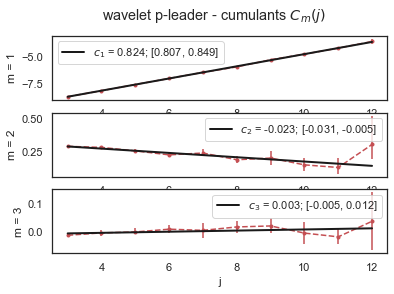

In [80]:
lwt.cumulants.plot()

In [64]:
lwt_b.cumulants.V_c2

array([4.15290507e-06, 7.08773702e-06])

In [78]:
lwt_b.cumulants.VE_c2(lwt.cumulants)

array([4.12739703e-06, 7.03263140e-06])

In [55]:
lwt_b.spectrum.STD_D_q(2).shape

AxisError: axis 1 is out of bounds for array of dimension 0

In [85]:
lwt_b.spectrum.hq.shape

(1, 2, 100)

In [83]:
lwt_b.spectrum.STD_Dq.shape

(1, 100)

In [79]:
lwt_b.cumulants.VE_C2(lwt.cumulants)

array([3.86929792e-05, 2.61852721e-05, 3.70566677e-05, 3.02842946e-05,
       4.10299597e-05, 1.07710398e-04, 1.41103820e-04, 1.31339106e-04,
       3.22922208e-04, 4.39767123e-04, 3.17879420e-03, 1.53677170e-02])

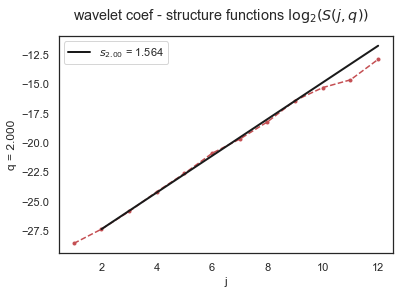

In [26]:
dwt.structure.plot()

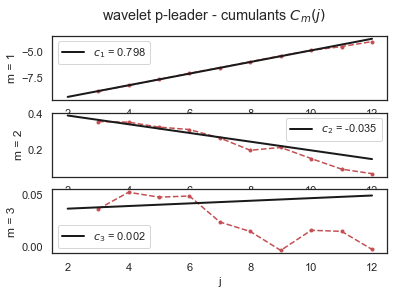

In [27]:
lwt.cumulants.plot()

In [21]:
dwt_b, lwt_b = mf_analysis(coef_boot, leader_boot, scaling_ranges=[(2, 12)], weighted=False, q=None, n_cumul=3)
dwt, lwt = mf_analysis(WT.wt_coefs, WT.wt_leaders, scaling_ranges=[(2, 12)], weighted=False, q=None, n_cumul=3)

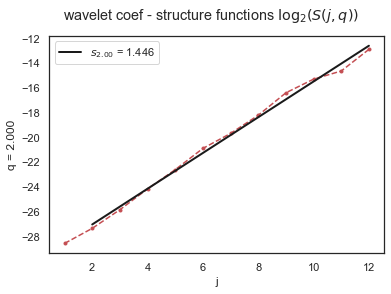

In [22]:
dwt.structure.plot()

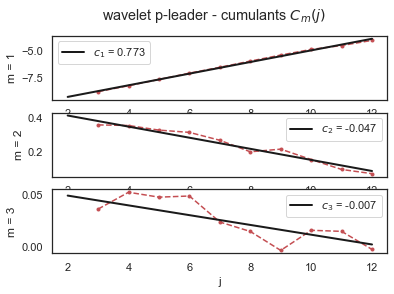

In [24]:
lwt.cumulants.plot()